## 0. Build the package with cmake and install sz3py target

```bash
mkdir build && cd build
cmake ..
cmake --build . --target sz3py
cmake --install .
```

The build system will install a .so file into `${PROJECT_ROOT}/tools/bindings/sz3py` folder. `pip install ${PROJECT_ROOT}/tools/bindings` should install the sz3py package into the selected python environment.


In [1]:
import sz3py
dir(sz3py)

['__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'compress',
 'decompress',
 'safeMPIFinalize',
 'test']

In [2]:
sz3py.__file__

'/home/yuanjian/miniconda3/envs/event_detection/lib/python3.10/site-packages/sz3py/sz3py.cpython-310-x86_64-linux-gnu.so'

## 1. Verify the .so file is correctly built

We can use `ctypes` and `importlib.util` to verify if the dynamic link library is correctly built.

In [3]:
import ctypes
lib = ctypes.CDLL("../tools/bindings/sz3py/sz3py.cpython-310-x86_64-linux-gnu.so")
print(lib)  

<CDLL '../tools/bindings/sz3py/sz3py.cpython-310-x86_64-linux-gnu.so', handle 2bf239f0 at 0x703628530b20>


In [4]:
import importlib.util
import os

so_path = "/home/yuanjian/miniconda3/envs/event_detection/lib/python3.10/site-packages/sz3py/sz3py.cpython-310-x86_64-linux-gnu.so"
spec = importlib.util.spec_from_file_location("sz3py", so_path)
sz3py = importlib.util.module_from_spec(spec)
spec.loader.exec_module(sz3py)

print(dir(sz3py))  

['__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'compress', 'decompress', 'test']


## 2. Compress NYX dataset

In [3]:
from pathlib import Path

DATA_PATH = Path("/media/briannas/Research/compression-data/nyx/")

COMPRESSED_DATA_PATH = Path("/media/briannas/Research/compression-data/compressed/")

temperature_raw_file_path = DATA_PATH / "temperature.f32"
temperature_compressed_file_path = COMPRESSED_DATA_PATH / "temperature.f32.szsplit"
temperature_decompressed_file_path = COMPRESSED_DATA_PATH  / "temperature.f32.dp"

In [6]:
compress_args = [
    "compress",
    "-i", str(temperature_raw_file_path),
    "-o", str(temperature_compressed_file_path),
    "-d", "512", "512", "512",
    "-e", "0.01",
    "--mode", "layer",
    "--depth", "32",
    # "--mpi",
    # running a mpi program requires the `mpirun` prorgam instead of inside Python
    "--threads", "4"
]
compress_args

['compress',
 '-i',
 '/media/briannas/Research/compression-data/nyx/temperature.f32',
 '-o',
 '/media/briannas/Research/compression-data/compressed/temperature.f32.szsplit',
 '-d',
 '512',
 '512',
 '512',
 '-e',
 '0.01',
 '--mode',
 'layer',
 '--depth',
 '32',
 '--threads',
 '4']

In [7]:
import sz3py
sz3py.compress(compress_args)

start to compress chunk 0, chunk_size: 33554432
finished compressing chunk 0, compressed_chunk_size: 16088679
Writing chunk with sequence number 0
start to compress chunk 1, chunk_size: 33554432
finished compressing chunk 1, compressed_chunk_size: 16227286
Writing chunk with sequence number 1
start to compress chunk 2, chunk_size: 33554432
finished compressing chunk 2, compressed_chunk_size: 16654795
Writing chunk with sequence number 2
start to compress chunk 3, chunk_size: 33554432
finished compressing chunk 3, compressed_chunk_size: 16700813
Writing chunk with sequence number 3
start to compress chunk 4, chunk_size: 33554432
finished compressing chunk 4, compressed_chunk_size: 16691824
Writing chunk with sequence number 4
start to compress chunk 5, chunk_size: 33554432
finished compressing chunk 5, compressed_chunk_size: 16824871
Writing chunk with sequence number 5
start to compress chunk 6, chunk_size: 33554432
finished compressing chunk 6, compressed_chunk_size: 16570357
Writing 

0

hunk 7, chunk_size: 33554432
finished compressing chunk 7, compressed_chunk_size: 16570636
Writing chunk with sequence number 7
start to compress chunk 8, chunk_size: 33554432
finished compressing chunk 8, compressed_chunk_size: 16246878
Writing chunk with sequence number 8
start to compress chunk 9, chunk_size: 33554432
finished compressing chunk 9, compressed_chunk_size: 15924371
Writing chunk with sequence number 9
start to compress chunk 10, chunk_size: 33554432
finished compressing chunk 10, compressed_chunk_size: 15808672
Writing chunk with sequence number 10
start to compress chunk 11, chunk_size: 33554432
finished compressing chunk 11, compressed_chunk_size: 15885684
Writing chunk with sequence number 11
start to compress chunk 12, chunk_size: 33554432
finished compressing chunk 12, compressed_chunk_size: 15877396
Writing chunk with sequence number 12
start to compress chunk 13, chunk_size: 33554432
finished compressing chunk 13, compressed_chunk_size: 15838360
Writing chunk wi

In [8]:
decompress_args = [
    "decompress",
    "-i", str(temperature_compressed_file_path),
    "-o", str(temperature_decompressed_file_path),
    "-d", "512", "512", "512",
    "-e", "0.01",
    "--mode", "layer",
    "--depth", "32",
    # "--mpi",
    # running a mpi program requires the `mpirun` prorgam instead of inside Python
    "--threads", "4"
]
decompress_args

['decompress',
 '-i',
 '/media/briannas/Research/compression-data/compressed/temperature.f32.szsplit',
 '-o',
 '/media/briannas/Research/compression-data/compressed/temperature.f32.dp',
 '-d',
 '512',
 '512',
 '512',
 '-e',
 '0.01',
 '--mode',
 'layer',
 '--depth',
 '32',
 '--threads',
 '4']

In [9]:
sz3py.decompress(decompress_args)

start to decompress chunk 0, compressed chunk size: 16088679


0

start to decompress chunk 1, compressed chunk size: 16227286
start to decompress chunk 2, compressed chunk size: 16654795
start to decompress chunk 3, compressed chunk size: 16700813
finished running SZ_decompress with decompressed_size: 33554432
finished running SZ_decompress with decompressed_size: 33554432
finished running SZ_decompress with decompressed_size: 33554432
finished decompressing chunk 1, decompressed_chunk_size: 33554432
finished decompressing chunk 0, decompressed_chunk_size: 33554432
finished running SZ_decompress with decompressed_size: 33554432
finished decompressing chunk 2, decompressed_chunk_size: 33554432
finished decompressing chunk 3, decompressed_chunk_size: 33554432
start to decompress chunk 4, compressed chunk size: 16691824
Writing chunk with sequence number 0
start to decompress chunk 5, compressed chunk size: 16824871
Writing chunk with sequence number 1
start to decompress chunk 6, compressed chunk size: 16570357
start to decompress chunk 7, compressed 

## 3. Visualize the decompressed data and raw data

In [4]:
def get_partial_preview_data(dimension: list[int], data_file: str, layer_number: int, is_float64: bool=False):
    import numpy as np
    from matplotlib.figure import Figure
    from matplotlib import pyplot as plt
    from io import BytesIO
    if len(dimension) != 3: 
        # error, this function only deals with 3D tensor
        return (-1, -1, -1)
    
    layer_size = dimension[0] * dimension[1]
    data_type = np.float32 if not is_float64 else np.float64
    
    with open(data_file, 'rb') as f:
        f.seek(layer_number * layer_size * np.dtype(data_type).itemsize)
        layer_data = np.fromfile(f, dtype=data_type, count=layer_size)
        layer_data = layer_data.reshape(dimension[0], dimension[1])

    fig = Figure(dpi=100)
    fig.subplots_adjust(bottom=0, top=1, left=0, right=1)
    ax = fig.add_subplot(111)
    data_min, data_max = np.min(layer_data), np.max(layer_data)
    ax.imshow(layer_data, cmap=plt.get_cmap('rainbow'), norm=plt.Normalize(vmin=data_min, vmax=data_max), aspect='auto')
    buf = BytesIO()
    fig.savefig(buf, format='png')

    return (buf, data_min, data_max)

In [8]:
layer_number = 400
dimension = [512, 512, 512]
is_float64 = False
raw_image_data, raw_data_min, raw_data_max = get_partial_preview_data(dimension, temperature_raw_file_path, layer_number, is_float64)
dp_image_data, dp_data_min, dp_data_max = get_partial_preview_data(dimension, temperature_decompressed_file_path, layer_number, is_float64)

In [9]:
raw_image_data

In [10]:
from PIL import Image
import numpy as np
raw_image = Image.open(raw_image_data)
raw_image_array = np.array(raw_image)
dp_image = Image.open(dp_image_data)
dp_image_array = np.array(dp_image)
raw_image_array.shape, dp_image_array.shape

((480, 640, 4), (480, 640, 4))

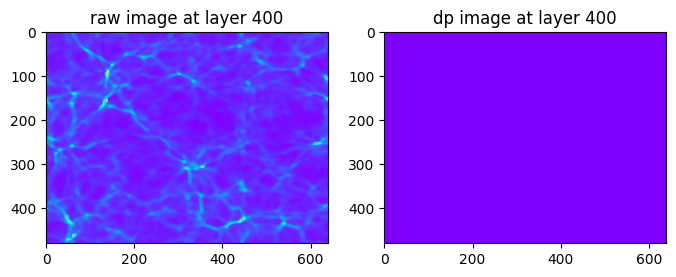

In [12]:
import matplotlib
from matplotlib import pyplot as plt

figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
axes[0].imshow(raw_image_array)
axes[0].set_title(f"raw image at layer {layer_number}")

axes[1].imshow(dp_image_array)
axes[1].set_title(f"dp image at layer {layer_number}")

plt.show()